In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
corr = df.corr()

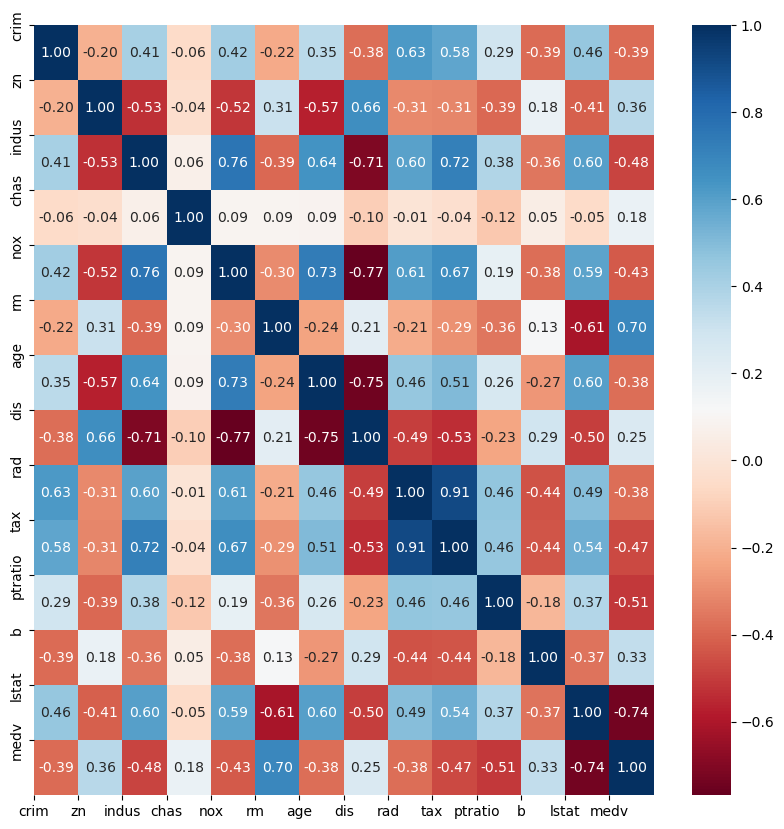

In [8]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,cmap = 'RdBu', annot = True, fmt = '0.2f')
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [9]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1,1)

In [10]:
y.shape

(506, 1)

In [11]:
x.shape

(506, 13)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 25)

In [13]:
print("Shapes")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes
X_train: (354, 13)
X_test: (152, 13)
y_train: (354, 1)
y_test: (152, 1)


In [14]:
mlr = LinearRegression()

In [15]:
mlr.fit(X_train,y_train)

LinearRegression()

In [16]:
print(f"b0: {mlr.intercept_}")
print(f"b1,b2: {mlr.coef_}")

b0: [38.10422593]
b1,b2: [[-1.15254380e-01  5.05163648e-02  2.73670712e-02  7.30471064e-01
  -1.89833026e+01  4.03133215e+00 -4.82896709e-03 -1.54999896e+00
   3.67470486e-01 -1.66700680e-02 -9.85758737e-01  7.44544822e-03
  -4.59169535e-01]]


In [17]:
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

In [18]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [19]:
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Testing R²: {r2_test}")

Training MSE: 22.643507749191382
Testing MSE: 21.597209035018473
Training R²: 0.7435787589010061
Testing R²: 0.7133593313710354


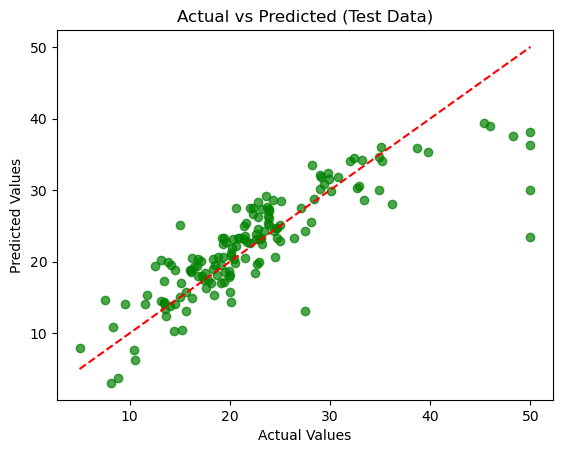

In [20]:
# Actual vs Predicted Plot for Test Data
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Test Data)")
plt.show()